In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Load the iris data set
iris = sns.load_dataset('iris')

print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Let's do a t-test first, to see if there is a significant difference between the sepal widths of two groups:

In [2]:

setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

t_stat, p_val = stats.ttest_ind(setosa, versicolor)
#an independent two-sample t-test, which is a statistical test 
# to determine if there is a significant difference between the means 
# of two independent groups.

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 9.454975848128596
P-value: 1.8452599454769322e-15


In [3]:

virginica = iris[iris['species'] == 'virginica']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

t_stat, p_val = stats.ttest_ind(virginica, versicolor)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 3.2057607502218186
P-value: 0.0018191004238894803


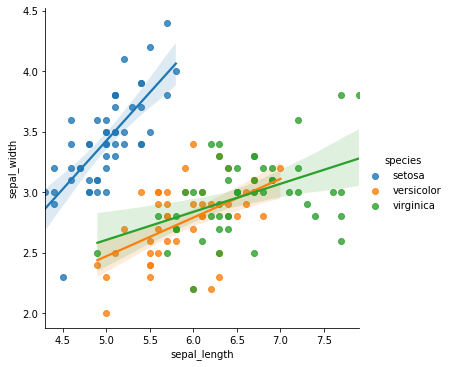

In [4]:
sns.lmplot(data = iris, x='sepal_length', y='sepal_width', hue = 'species')

The very low p-value indicates that there is a significant difference. Is this true for all categories? Try it yourself!

In [14]:
#example
data = {
    'Age': [25, 37, 42, 18, 55, 32, 28, 40, 51, 30],
    'Income': [35000, 50000, 65000, 30000, 80000, 45000, 40000, 70000, 75000, 55000]
}

df = pd.DataFrame(data)

# Bin the 'Age' column into three categories: Young, Middle-aged, and Elderly
age_bins = [18, 30, 45, 60]
age_labels = ['Young', 'Middle-aged', 'Elderly']
df['Age Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

print(df) 


   Age  Income Age Category
0   25   35000        Young
1   37   50000  Middle-aged
2   42   65000  Middle-aged
3   18   30000          NaN
4   55   80000      Elderly
5   32   45000  Middle-aged
6   28   40000        Young
7   40   70000  Middle-aged
8   51   75000      Elderly
9   30   55000        Young


In [16]:
data = {
    'Major': ['Math', 'Math', 'Physics', 'Physics', 'Physics', 'Computer Science', 'Computer Science'],
    'Grade': ['A', 'B', 'B', 'C', 'A', 'B', 'A']
}

df = pd.DataFrame(data)

# Generate the contingency table using pd.crosstab
table = pd.crosstab(df['Major'], df['Grade'])
#pd.crosstab(index, columns)
print(table)

Grade             A  B  C
Major                    
Computer Science  1  1  0
Math              1  1  0
Physics           1  1  1


Next, let's compute the Chi-squared test:

In [17]:
# Convert 'sepal_width' to a categorical variable
iris['sepal_width_cat'] = pd.cut(iris['sepal_width'], bins=[0, 3, 3.5, 4])

# Create a contingency table
contingency_table = pd.crosstab(iris['species'], iris['sepal_width_cat'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
# determine whether there is a significant association between two 
# categorical variables in a dataset.
print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")
#You can use the outputs of stats.chi2_contingency to assess the statistical 
# significance of the association between the variables. 
# If the p-value is below a chosen significance level (e.g., 0.05),
#  you can reject the null hypothesis of independence and conclude 
# that there is evidence of an association between the variables.

Chi-squared: 51.132288195334525
P-value: 2.0945619933052866e-10


In [11]:
print(contingency_table)

sepal_width_cat  (0.0, 3.0]  (3.0, 3.5]  (3.5, 4.0]
species                                            
setosa                    8          26          13
versicolor               42           8           0
virginica                33          14           3


We do see a statistical significance. Let's move on to an ANOVA test, to see if there is a difference between the means of all 3 groups

In [18]:
setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']
virginica = iris[iris['species'] == 'virginica']['sepal_width']

f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)
#(ANOVA) test to determine whether there are any significant 
# differences among the means of two or more groups or populations.

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 49.160040089612075
P-value: 4.492017133309115e-17


This indicates strong evidence of at least one significant difference among the group means.

Now let's calculate Pearson's correlation between two continuous variables:

In [8]:
pearson_corr, p_val = stats.pearsonr(iris['sepal_length'], iris['sepal_width'])

print(f"Pearson's correlation: {pearson_corr}")
print(f"P-value: {p_val}")

Pearson's correlation: -0.11756978413300204
P-value: 0.15189826071144918


 null hypothesis of no correlation between x and y.

In [9]:
pearson_corr, p_val = stats.pearsonr(iris[iris['species']=='setosa']['sepal_length'], iris[iris['species']=='setosa']['sepal_width'])

print(f"Pearson's correlation: {pearson_corr}")
print(f"P-value: {p_val}")

Pearson's correlation: 0.7425466856651597
P-value: 6.70984301766055e-10


We can also calculate Pearson's correlation directly in Pandas.

In [19]:
iris.corr(numeric_only=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

The null hypothesis for a linear relatinship is that there is NO linear relationship. We can see in this case that the correlation is a low value, and the p-value indicates an insignificant relationship.

Let's try a non-parametric test, Mann-Whitney, to compare means:

In [21]:
setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

U_stat, p_val = stats.mannwhitneyu(setosa, versicolor)
#whether there are significant differences between two independent samples.
#null: there are no difference 

print(f"U-statistic: {U_stat}")
print(f"P-value: {p_val}")


U-statistic: 188.0
P-value: 1.0716898640387601e-13


Let's try the Kruskal-Wallis test.

In [22]:
setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']
virginica = iris[iris['species'] == 'virginica']['sepal_width']

H, pval = stats.kruskal(setosa, versicolor, virginica)
#compare the medians of two or more independent samples.


print('The test statistic:', H)
print('The p-value of the test:', pval)

The test statistic: 63.571146104163795
The p-value of the test: 1.5692820940316782e-14
